In [72]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np  
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [14]:
books = pd.read_csv("/Users/venkatvive/Documents/projects/reading-recommender/data/raw/books_data/books.csv",sep=';',encoding='latin-1', on_bad_lines='skip')
ratings = pd.read_csv("/Users/venkatvive/Documents/projects/reading-recommender/data/raw/books_data/ratings.csv", sep=';', encoding='latin-1', on_bad_lines='skip')
users = pd.read_csv("/Users/venkatvive/Documents/projects/reading-recommender/data/raw/books_data/users.csv", sep=';', encoding='latin-1', on_bad_lines='skip')

/var/folders/29/8mqkffd90k13_lp4kr_289l80000gn/T/ipykernel_56054/1026773858.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/Users/venkatvive/Documents/projects/reading-recommender/data/raw/books_data/books.csv",sep=';',encoding='latin-1', on_bad_lines='skip')


In [17]:
print(users.shape)
print(ratings.shape)
print(books.shape)

(278858, 3)
(1149780, 3)
(271360, 8)


In [18]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [30]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [31]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [32]:
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [33]:
books = books[(books['Year-Of-Publication'] != 'DK Publishing Inc') & (books['Year-Of-Publication'] != 'Gallimard')]

In [34]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')

/var/folders/29/8mqkffd90k13_lp4kr_289l80000gn/T/ipykernel_56054/3440087300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')


In [35]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [40]:
books = books.dropna(subset=['Publisher'])
books.Publisher.isnull().sum()

0

In [43]:
books = books[(books['Year-Of-Publication'] <= 2025) & (books['Year-Of-Publication'] > 0)]

In [46]:
sorted(books["Year-Of-Publication"].unique())

[1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024]

In [41]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [47]:
users.loc[(users['Age'] < 5) | (users['Age'] > 90), 'Age'] = np.nan

In [48]:
users.Age = users.Age.fillna(users.Age.mean())

In [51]:
users.Age = users.Age.astype(np.int32)

In [53]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [54]:
ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [55]:
ratings = ratings[ratings['Book-Rating'] != 0]

In [56]:
ratings.shape

(378032, 3)

<Axes: xlabel='Book-Rating', ylabel='count'>

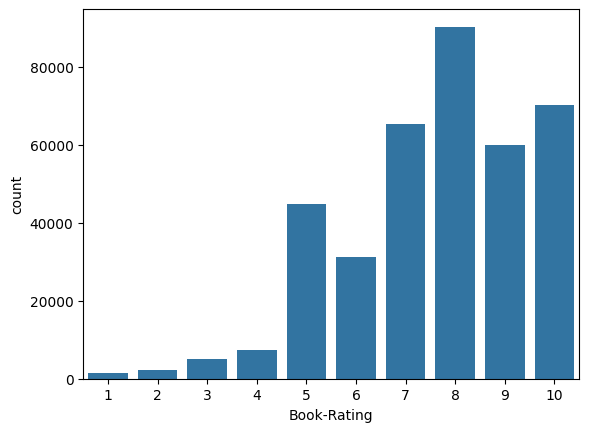

In [58]:
sns.countplot(x='Book-Rating', data=ratings)
plt.show()

In [59]:
## Collaborative Filtering

counts1 = ratings['User-ID'].value_counts()

In [61]:
ratings = ratings[ratings['User-ID'].isin(counts1[counts1 >= 100].index)]

In [63]:
ratings.shape

(101119, 3)

In [64]:
ratings_matrix = ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns

print(ratings_matrix.shape)

(438, 64967)


In [66]:
ratings_matrix.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001845039,...,B00001U0CP,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000T6KHI,B0000VZEJQ,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
books.to_csv("/Users/venkatvive/Documents/projects/reading-recommender/data/processed/amazon_books.csv", index=False)
users.to_csv("/Users/venkatvive/Documents/projects/reading-recommender/data/processed/amazon_users.csv", index=False)
ratings.to_csv("/Users/venkatvive/Documents/projects/reading-recommender/data/processed/amazon_ratings.csv", index=False)

In [73]:
from scipy.sparse.linalg import svds
U50, sigma50, Vt50 = svds(ratings_matrix.values, k=50)

In [78]:
signma = np.diag(sigma50)
all_user_predicted_ratings = np.dot(np.dot(U50, signma), Vt50)
predictions_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns)

In [79]:
predictions_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001845039,...,B00001U0CP,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000T6KHI,B0000VZEJQ,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025357,-0.001705,-0.002557,-0.002557,0.003058,-0.002273,0.007076,0.007076,0.055355,-0.013318,...,0.169070,-0.007040,0.000351,0.000418,0.042739,-0.083198,0.005282,0.000234,-0.001390,0.068290
1,-0.010175,-0.002626,-0.003939,-0.003939,0.001029,-0.003501,-0.003407,-0.003407,0.002047,-0.005207,...,-0.015274,0.004064,-0.000362,0.000390,0.007992,-0.028602,0.000986,-0.000241,-0.000011,-0.013541
2,-0.015245,-0.010948,-0.016422,-0.016422,0.007475,-0.014597,0.012000,0.012000,-0.004567,0.024369,...,0.006530,-0.010303,-0.000462,0.001747,0.050301,0.119012,0.006832,-0.000308,0.008937,-0.057548
3,-0.021651,0.027501,0.041251,0.041251,0.030449,0.036668,-0.001251,-0.001251,0.025825,-0.026442,...,-0.062793,-0.037828,0.002834,0.008726,0.090227,0.023005,0.028282,0.001890,0.029975,-0.046821
4,0.002300,-0.005735,-0.008603,-0.008603,0.003347,-0.007647,0.000647,0.000647,-0.022956,-0.001256,...,0.002547,0.000658,0.002152,0.001463,-0.010372,0.699869,0.002384,0.001435,0.005140,0.049496


In [81]:
sample_id = 9
sampleUID = ratings_matrix.iloc[sample_id, :].name


In [82]:
sampleUID

6575

In [83]:
sorted_user_predictions = predictions_df.iloc[sample_id].sort_values(ascending=False)

In [84]:
len(sorted_user_predictions)

64967

In [85]:
user_data = ratings[ratings['User-ID']==sampleUID]

In [86]:
user_data.head()

,User-ID,ISBN,Book-Rating
28134,6575,006000438X,9
28135,6575,0060081961,8
28141,6575,0060194995,9
28142,6575,0060198133,8
28143,6575,0060502258,8


In [87]:
book_data = books[books['ISBN'].isin(user_data.ISBN)]

In [89]:
book_data.shape

(231, 8)

In [90]:
user_full_info = pd.merge(user_data, book_data, on='ISBN')

In [91]:
user_full_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,6575,006000438X,9,The Death of Vishnu: A Novel,Manil Suri,2002,Perennial,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...
1,6575,0060081961,8,Once Upon a Town: The Miracle of the North Pla...,Bob Greene,2002,William Morrow,http://images.amazon.com/images/P/0060081961.0...,http://images.amazon.com/images/P/0060081961.0...,http://images.amazon.com/images/P/0060081961.0...
2,6575,0060194995,9,To Kill a Mockingbird : The 40th Anniversary E...,Harper Lee,1999,HarperCollins,http://images.amazon.com/images/P/0060194995.0...,http://images.amazon.com/images/P/0060194995.0...,http://images.amazon.com/images/P/0060194995.0...
3,6575,0060198133,8,Five Quarters of the Orange,Joanne Harris,2001,William Morrow &amp; Company,http://images.amazon.com/images/P/0060198133.0...,http://images.amazon.com/images/P/0060198133.0...,http://images.amazon.com/images/P/0060198133.0...
4,6575,0060502258,8,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,HarperTorch,http://images.amazon.com/images/P/0060502258.0...,http://images.amazon.com/images/P/0060502258.0...,http://images.amazon.com/images/P/0060502258.0...
...,...,...,...,...,...,...,...,...,...,...
226,6575,1573229725,8,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
227,6575,1580291023,6,Elvis: Unknown Stories Behind the Legend,Jim Curtin,1998,Celebrity Books,http://images.amazon.com/images/P/1580291023.0...,http://images.amazon.com/images/P/1580291023.0...,http://images.amazon.com/images/P/1580291023.0...
228,6575,185828869X,8,The Rough Guide to New York City,Martin Dunford,2002,Rough Guides Limited,http://images.amazon.com/images/P/185828869X.0...,http://images.amazon.com/images/P/185828869X.0...,http://images.amazon.com/images/P/185828869X.0...
229,6575,1864503157,8,Lonely Planet Catalunya &amp; the Costa Brava ...,Damien Simonis,2001,Lonely Planet Publications,http://images.amazon.com/images/P/1864503157.0...,http://images.amazon.com/images/P/1864503157.0...,http://images.amazon.com/images/P/1864503157.0...


In [92]:
recommendations = pd.merge(books[~books['ISBN'].isin(user_full_info['ISBN'])], pd.DataFrame(sorted_user_predictions).reset_index(), how='left', left_on='ISBN', right_on='ISBN').rename(columns={sample_id: 'Predictions'})

In [93]:
recommendations.shape

(266494, 9)

In [95]:
recommendations.sort_values(by='Predictions', ascending=False).iloc[0:10]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Predictions
393,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,4.927972
722,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,4.050393
37,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,4.035238
1341,0345361792,A Prayer for Owen Meany,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,2.766682
1445,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,2.678247
3816,0316096199,Lucky : A Memoir,Alice Sebold,2002,Back Bay Books,http://images.amazon.com/images/P/0316096199.0...,http://images.amazon.com/images/P/0316096199.0...,http://images.amazon.com/images/P/0316096199.0...,2.589007
115,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,2.456472
4302,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,2.195558
472,0805063897,Nickel and Dimed: On (Not) Getting By in America,Barbara Ehrenreich,2002,Owl Books,http://images.amazon.com/images/P/0805063897.0...,http://images.amazon.com/images/P/0805063897.0...,http://images.amazon.com/images/P/0805063897.0...,2.192986
8424,0452284449,The Virgin Blue,Tracy Chevalier,2003,Plume Books,http://images.amazon.com/images/P/0452284449.0...,http://images.amazon.com/images/P/0452284449.0...,http://images.amazon.com/images/P/0452284449.0...,2.185957


In [98]:
def isValid(s: str) -> bool:
        bracket_mapping = {
            '(':')',
            '{':'}',
            '[':']'
        }
        isValid = False
        for open in range(len(s)): 
            print(s[open])
            if s[open] in bracket_mapping:
                for close in range(open, len(s)):
                    if s[close] != bracket_mapping[s[open]]:
                        isValid = False
                    else:
                        isValid = True
        return isValid
        

In [145]:
def lengthOfLongestSubstring(s: str) -> int:
        substrings = {}
        for start in range(len(s)-1):
            for end in range(start+1, len(s)):
                if s[end] in s[start:end]:
                    substrings[s[start:end]] = len(s[start:end])
                    break
                elif end == len(s)-1:
                    substrings[s[start:end+1]] = len(s[start:end+1])
        print(substrings)
        if not substrings:
             return len(s)
        else:
            return max(list(substrings.values()))
        

In [146]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        n = len(s)
        maxLength = 0
        charSet = set()
        left = 0

        for right in range(n):
            if s[right] not in charSet: 
                charSet.add(s[right])
                maxLength = max(maxLength, right - left+1)
            else:
                while s[right] in charSet:
                    charSet.remove(s[left])
                    left+= 1
                charSet.add(s[right])

        return maxLength

{'abc': 3, 'bca': 3, 'cab': 3, 'bc': 2, 'cb': 2, 'b': 1}
3


In [179]:
def longestCommonPrefix(strs: list[str]) -> str:
        common_prefixes = []
        for i in range(0, len(strs[0])):
            for word in strs: 
                print("prefix",  strs[0][:i+1], "word", word)
                if strs[0][:i+1] not in word:
                    print("not in word")
                    return max(common_prefixes) if common_prefixes else ""
            common_prefixes.append(strs[0][:i+1])
        
        return max(common_prefixes) if common_prefixes else ""

In [178]:
strs = ["a"]
print(strs[0][:1])

a


In [180]:
print(longestCommonPrefix(["a"]))

prefix a word a
a
